# Lung Cancer Presence Prediction

## Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('SurveyLungCancer.csv')

In [2]:
# Display data types,variables and the number of observations of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [3]:
# Display first few rows of the dataset
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Converting the categorical columns to numerical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding Gender Column
data['GENDER'] = le.fit_transform(data['GENDER'])

# Encoding Gender Column
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


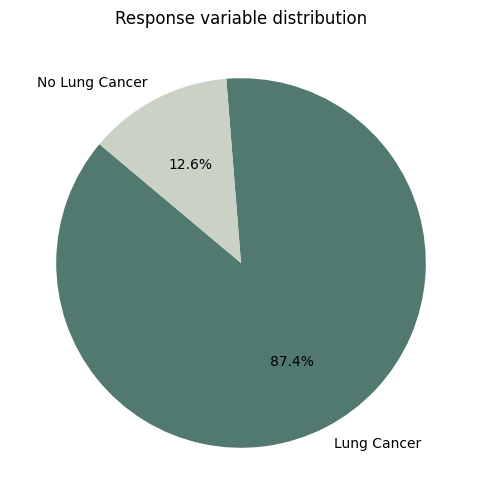

In [5]:
# Response counts

counts = data['LUNG_CANCER'].value_counts()
print(counts)

import matplotlib.pyplot as plt

# Plot the response counts
plt.figure(figsize=(6, 6))
colors = ['#52796F', '#CAD2C5']
labels = [ 'Lung Cancer','No Lung Cancer']
plt.pie(counts,labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')

plt.title('Response variable distribution')
plt.show()

In [6]:
# Random oversampling to balance the response categories

from imblearn.over_sampling import RandomOverSampler

X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

# Apply Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

data_new = pd.DataFrame(X_resampled)
data_new['LUNG_CANCER'] = y_resampled

# Count the new class distribution
print(pd.Series(y_resampled).value_counts())

LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


In [7]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


## Exploratory Data Analysis

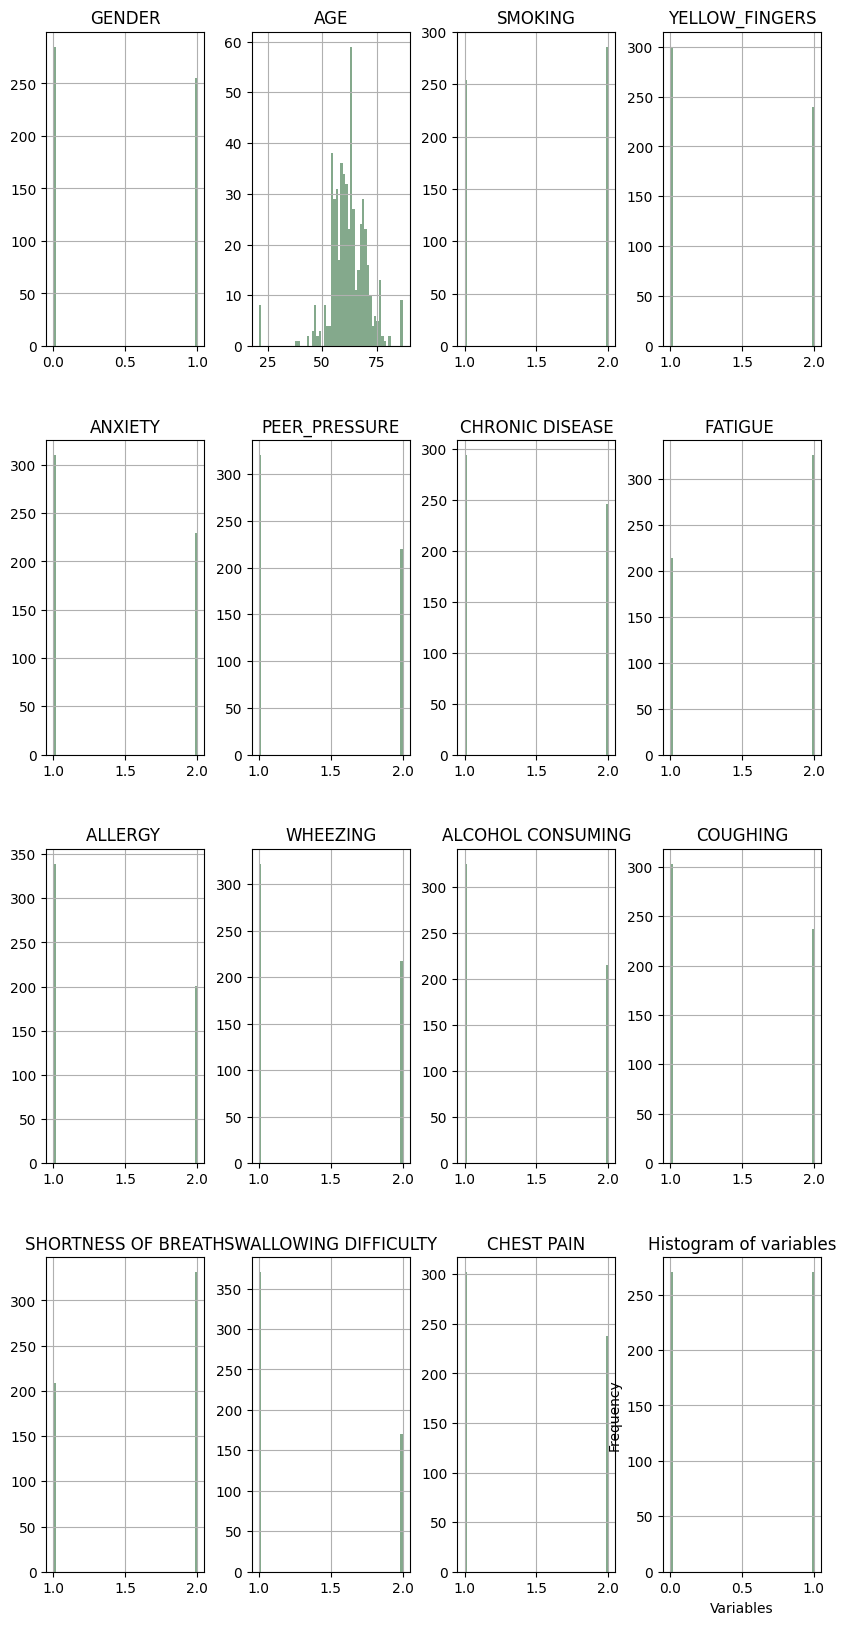

In [8]:
import seaborn as sns

data_new.hist(bins=60,figsize=(10,20),color='#84A98C')
plt.title('Histogram of variables')
plt.xlabel('Variables')
plt.ylabel('Frequency')
plt.show()

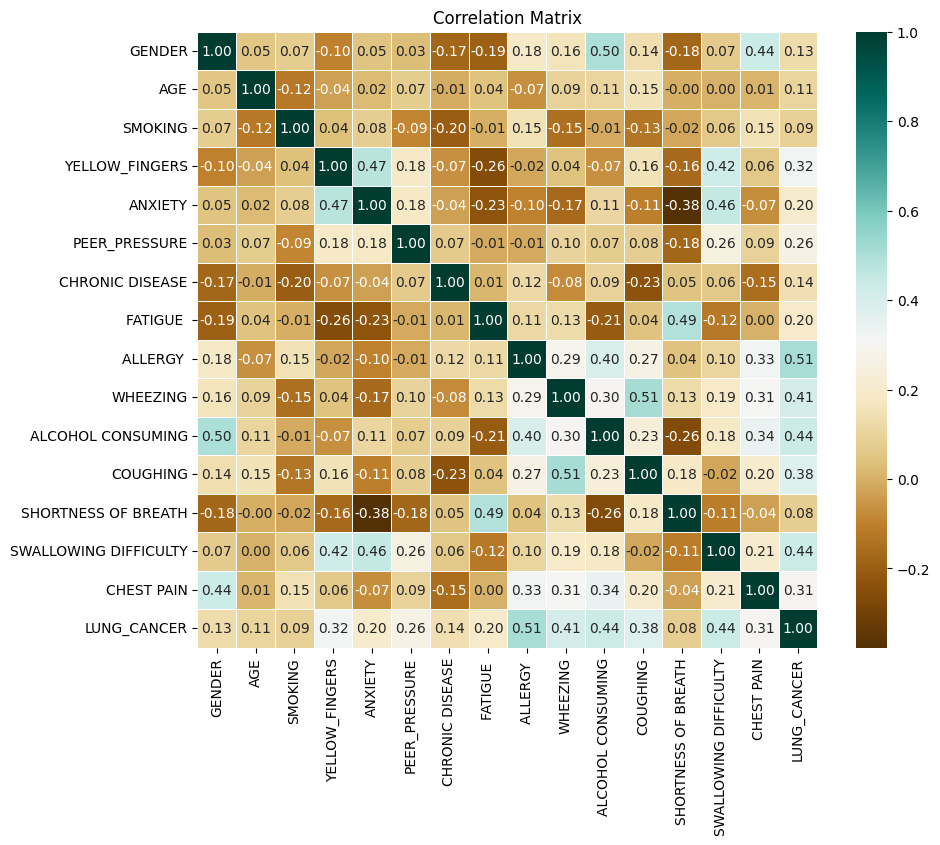

In [9]:
# Compute the correlation matrix
correlation_matrix = data_new.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LUNG_CANCER', y='AGE', data=data_new,color='#52796F')
plt.title(f'Distribution of Age by Lung Cancer')
plt.xlabel('Presence of Lung Cancer')
plt.ylabel('Age')
plt.show()

In [ ]:
categorical_features = data_new.drop(columns=['LUNG_CANCER','AGE']).columns
colours = ['#CAD2C5', '#354F52']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='LUNG_CANCER', data=data_new,palette = colours)
    plt.title(f'Count Plot of {feature} by Presence of Lung Cancer')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['No Lung Cancer', 'Lung Cancer'])
    plt.show()

## Advance Analysis

In [ ]:
# Spliting the dataset into train and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=15)

### Filter method - Chi square test

In [ ]:
from scipy.stats import chi2_contingency

# Checking expected frequency counts
results = {}
for feature in X_train.columns:
    contingency_table = pd.crosstab(X_train[feature], y_train)
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Check if all expected frequencies are at least 5
    expected_freq_valid = (expected >= 5).all()

    results[feature] = {
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Expected Frequencies Valid': expected_freq_valid,
        'Expected Frequencies': expected
    }

# Display results
chi_values = []
for feature, result in results.items():
    chi_values.append({
        'Feature': feature,
        'Chi2 Statistic': round(result['Chi2 Statistic'], 4),
        'p-value': round(result['p-value'], 4),
        'Expected f Validity': result['Expected Frequencies Valid']
    })

chi_table = pd.DataFrame(chi_values)
print(chi_table)

In [ ]:
import statsmodels.api as sm

selected = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Filter features
X_train_chi = X_train[selected]
X_test_chi = X_test[selected]

# View selected features
print("Number of features selected: ",len(selected))
print(f"Selected feature names: {selected}")

# Add a constant to the model (intercept term)
X_train_chi = sm.add_constant(X_train_chi)
X_test_chi = sm.add_constant(X_test_chi)

# Train model
model_chi = sm.Logit(y_train, X_train_chi).fit()

# Get the summary of the model
model_summary_chi = model_chi.summary()

# Print the summary
print(model_summary_chi)

# Predict using test set
y_pred_chi = model_chi.predict(X_test_chi)
y_pred_chi_class = (y_pred_chi >= 0.5).astype(int)

### Wrapped method - Forward selection


In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model1 = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model1.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features, len(best_features)

best_features, num_best_features = forward_selection(X_train,y_train)

# Features selected
print("Number of features selected: ",num_best_features)
print(f"Selected feature names: {best_features}")

# Add a constant to the model (intercept term)
X_train_FS = sm.add_constant(X_train[best_features])
X_test_FS = sm.add_constant(X_test[best_features])

# Train the model using statsmodels
model_FS = sm.Logit(y_train, X_train_FS).fit()

# Get the summary of the model
model_summary_FS = model_FS.summary()
print(model_summary_FS)

# Predict using test set
y_pred_FS = model_FS.predict(X_test_FS)
y_pred_FS_class = (y_pred_FS >= 0.5).astype(int)


### Wrapped method - Backward elimination

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        model2 = sm.Logit(target, features_with_constant).fit(disp=0)
        p_values = model2.pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features, len(features)


features, num_features = backward_elimination(X_train,y_train)

#Features selected
print("Number of features selected: ",num_features)
print(f"Selected feature names: {features}")

# Add a constant to the model (intercept term)
X_train_BE = sm.add_constant(X_train[features])
X_test_BE = sm.add_constant(X_test[features])

# Train the model using statsmodels
model_BE = sm.Logit(y_train, X_train_BE).fit()

# Get the summary of the model
model_summary_BE = model_BE.summary()
print(model_summary_BE)

# Predict using test set
y_pred_BE = model_BE.predict(X_test_BE)
y_pred_BE_class = (y_pred_BE >= 0.5).astype(int)


### Embedded method - Lasso regularization

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Defining the grid of alpha values
alphas = 10**np.linspace(5, -5, 100)

# Fitting the Lasso model
lasso = Lasso(max_iter=10000)
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=1)
lasso_cv.fit(X_train, y_train)

# Best alpha value from cross-validation
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

# Fit the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_train, y_train)

# Predicting on the test set
lasso_pred = lasso_best.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
print("\nMean Squared Error:", mse)

# Converting the predictions into two categories based on the threshold value
threshold = 0.5
lasso_pred_class = (lasso_pred > threshold).astype(int)

# Extracting the coefficients
lasso_coef = lasso_best.coef_

# Non zero feature
non_zero_indices = np.where(lasso_coef != 0)[0]
non_zero_features = X_train.columns[non_zero_indices]

print("\nTotal number of features:", len(lasso_coef))
print("Number of non-zero features:", len(non_zero_features))

# Create a DataFrame to display coefficients alongside feature names
coef_summary = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_coef
})

print("\nLasso coefficients:")
print(coef_summary)

### Model Accuracies

In [ ]:
from sklearn.metrics import accuracy_score

# Chi squared method model
accuracy_chi = accuracy_score(y_test, y_pred_chi_class)
print(f"Accuracy for chi squared: {accuracy_chi:.4f}")
mse_chi = mean_squared_error(y_test, y_pred_chi_class)
print(f"Mean Squared Error: {mse_chi:.4f}")
print("Number of features selected: ",len(selected))
print("Features selected: ")
print(selected)

# Forward selection model
accuracy_FS = accuracy_score(y_test, y_pred_FS_class)
print(f"\nAccuracy for forward selection: {accuracy_FS:.4f}")
mse_FS = mean_squared_error(y_test, y_pred_FS_class)
print(f"Mean Squared Error: {mse_FS:.4f}")
print("Number of features selected: ",len(best_features))
print("Features selected: ")
print(best_features)

# Backward elimination model
accuracy_BE = accuracy_score(y_test, y_pred_BE_class)
print(f"\nAccuracy for backward elimination: {accuracy_BE:.4f}")
mse_BE = mean_squared_error(y_test, y_pred_BE_class)
print(f"Mean Squared Error: {mse_BE:.4f}")
print("Number of features selected: ",len(features))
print("Features selected: ")
print(features)

# Lasso regularization model
accuracy_lasso = accuracy_score(y_test, lasso_pred_class)
print(f"\nAccuracy for lasso regularization: {accuracy_lasso:.4f}")
mse_lasso = mean_squared_error(y_test, lasso_pred_class)
print(f"Mean Squared Error: {mse_lasso:.4f}")
print("Number of features selected: ",len(non_zero_features))
print("Features selected: ")
print(non_zero_features)
